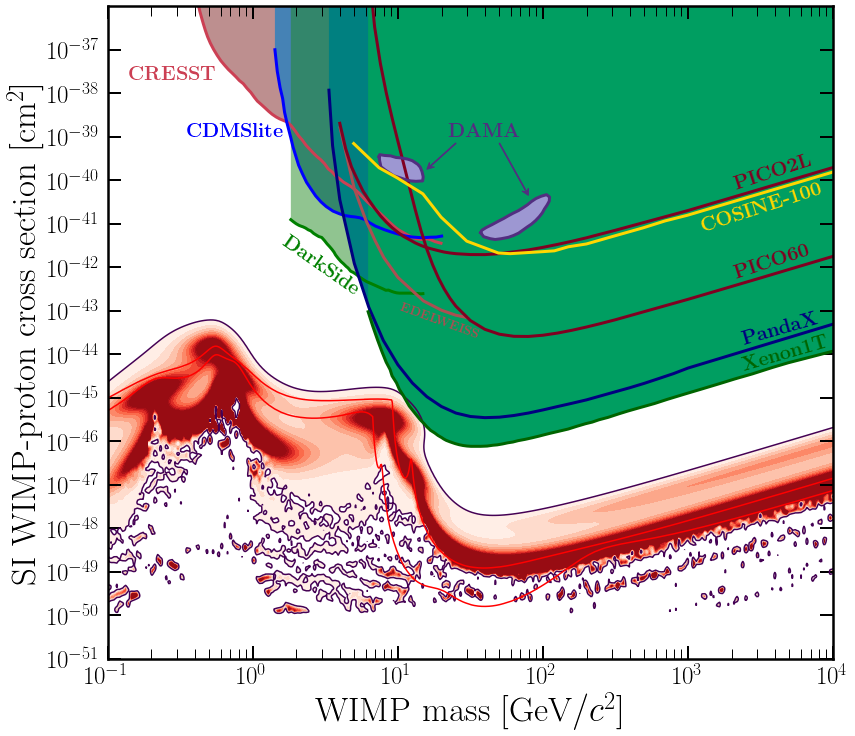

In [3]:
from numpy import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.ndimage.filters import gaussian_filter1d
import matplotlib.colors as colors
plt.rcParams['axes.linewidth'] = 2.5
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=25)
fig = plt.figure(figsize=(13,12))
ax = fig.add_subplot(111)


# Colormap for contour plot
cmap = plt.get_cmap('Reds')
my_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=0, b=0.9),
        cmap(flipud(linspace(0, 0.9, 10))))
my_cmap.set_bad('white')
my_cmap.set_over('white')

# Contour plot
data = loadtxt('../code/nuTest-F-Low.txt')
#Nsig = flipud(transpose(loadtxt('../code/nuTest-F-Low-Nsig.txt')))
#Nbg = flipud(transpose(loadtxt('../code/nuTest-F-Low-Nbg.txt')))
sig = data[0,1:]
m = data[1:,0]
n = size(m)
Ex = flipud(transpose((data[1:,1:])))
DY = zeros(shape=shape(Ex))
for j in range(0,n):
    #y = log10(Ex[:,j])
    y = gaussian_filter1d(log10(Ex[:,j]),sigma=3)
    dy = gradient(y)
    dy[isnan(dy)] = 0.0
    dy[abs(dy)==inf] = 0.0
    DY[:,j] = gradient(y,log10(sig[2])-log10(sig[1]))
plt.contourf(m,sig,DY,300,vmin=-3.0,vmax=-2.0,cmap=my_cmap)
plt.contour(m,sig,DY,levels=[-2.0])

nu_F = loadtxt("../data/WIMPLimits/SI/nufloor-F.txt")
plt.plot(nu_F[:,0],nu_F[:,1],'r-')
nu_F = loadtxt("../data/WIMPLimits/SI/nufloor-Xe.txt")
plt.plot(nu_F[:,0],nu_F[:,1],'r-')

xmin = 0.1
xmax = 1.0e4
ymax = 1.0e-36
ymin = 1.0e-51
plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])
plt.yscale('log')
plt.xscale('log')


#####
# Expt limits
CRESST = loadtxt("../data/WIMPLimits/SI/CRESST.txt")
plt.fill_between(CRESST[:,0], CRESST[:,1],edgecolor=None,y2=ymax,facecolor=[0.74, 0.56, 0.56])
plt.plot(CRESST[:,0], CRESST[:,1],color=[0.8, 0.25, 0.33],linewidth=3)
plt.text(0.14,2.0e-38,r"{\bf CRESST}",color=[0.8, 0.25, 0.33],fontsize=20,rotation=0)

CDMSLite = loadtxt("../data/WIMPLimits/SI/CDMSLite.txt")
plt.fill_between(CDMSLite[:,0], CDMSLite[:,1],edgecolor=None,y2=ymax,facecolor=[0.27, 0.51, 0.71])
plt.plot(CDMSLite[:,0], CDMSLite[:,1],color="blue",linewidth=3)
plt.text(0.35,1.0e-39,r"{\bf CDMSlite}",color="blue",fontsize=20,rotation=0)

DarkSide = loadtxt("../data/WIMPLimits/SI/DarkSide.txt")
plt.fill_between(DarkSide[:,0], DarkSide[:,1],edgecolor=None,y2=ymax,facecolor="forestgreen",alpha=0.5)
plt.plot(DarkSide[:,0], DarkSide[:,1],color="green",linewidth=3)
plt.text(1.5,3.0e-42,r"{\bf DarkSide}",color="green",fontsize=20,rotation=-35)

PandaX = loadtxt("../data/WIMPLimits/SI/PandaX.txt")
plt.fill_between(PandaX[:,0], PandaX[:,1],edgecolor=None,y2=ymax,facecolor="teal")
plt.plot(PandaX[:,0], PandaX[:,1],color="navy",linewidth=3)
plt.text(2300.0,5.0e-44,r"{\bf PandaX}",color="navy",fontsize=20,rotation=16)

XENON1T = loadtxt("../data/WIMPLimits/SI/XENON1T.txt")
plt.fill_between(XENON1T[:,0], XENON1T[:,1],edgecolor=None,y2=ymax,facecolor=[0.0, 0.62, 0.38])
plt.plot(XENON1T[:,0], XENON1T[:,1],color="darkgreen",linewidth=3)
plt.text(2300.0,1.5e-44,r"{\bf Xenon1T}",color="darkgreen",fontsize=20,rotation=16)

EDELWEISS = loadtxt("../data/WIMPLimits/SI/EDELWEISS.txt")
plt.plot(EDELWEISS[:,0], EDELWEISS[:,1],color=[0.67, 0.31, 0.32],linewidth=3)
plt.text(10.0,1.0e-43,r"{\bf EDELWEISS}",color=[0.67, 0.31, 0.32],fontsize=13,rotation=-20)

PICO60 = loadtxt("../data/WIMPLimits/SI/PICO60.txt")
plt.plot(PICO60[:,0], PICO60[:,1],color=[0.5, 0.0, 0.13],linewidth=3)
plt.text(2000.0,2.0e-42,r"{\bf PICO60}",color=[0.5, 0.0, 0.13],fontsize=20,rotation=18)

PICO2L = loadtxt("../data/WIMPLimits/SI/PICO2L.txt")
plt.plot(PICO2L[:,0], PICO2L[:,1],color=[0.5, 0.0, 0.13],linewidth=3)
plt.text(2000.0,2.3e-40,r"{\bf PICO2L}",color=[0.5, 0.0, 0.13],fontsize=20,rotation=18)


DAMA1 = loadtxt("../data/WIMPLimits/SI/DAMA1.txt")
DAMA2 = loadtxt("../data/WIMPLimits/SI/DAMA2.txt")
plt.fill_between(DAMA1[:,0], DAMA1[:,1],edgecolor=None,y2=ymax,facecolor=[ 0.615,  0.594,  0.825])
plt.fill_between(DAMA2[:,0], DAMA2[:,1],edgecolor=None,y2=ymax,facecolor=[ 0.615,  0.594,  0.825])
plt.plot(DAMA1[:,0], DAMA1[:,1],color=[0.32, 0.18, 0.5],linewidth=3)
plt.plot(DAMA2[:,0], DAMA2[:,1],color=[0.32, 0.18, 0.5],linewidth=3)
plt.text(22.0,1e-39,r"{\bf DAMA}",color=[0.32, 0.18, 0.5],fontsize=20)
plt.arrow(0.48, 0.79, -0.04, -0.04, transform=ax.transAxes,
          length_includes_head=True,
          head_width=0.01, head_length=0.01, overhang=0.4,
          edgecolor=[0.32, 0.18, 0.5],facecolor=[0.32, 0.18, 0.5])
plt.arrow(0.54, 0.79, 0.04, -0.08, transform=ax.transAxes,
          length_includes_head=True,
          head_width=0.01, head_length=0.01, overhang=0.4,
          edgecolor=[0.32, 0.18, 0.5],facecolor=[0.32, 0.18, 0.5])

COSINE = loadtxt("../data/WIMPLimits/SI/COSINE-100.txt")
plt.plot(COSINE[:,0], COSINE[:,1],color="gold",linewidth=3)
plt.text(1200.0,5.0e-41,r"{\bf COSINE-100}",color="gold",fontsize=20,rotation=18)

# Labels
plt.xlabel(r"WIMP mass [GeV$/c^2$]",fontsize=35)
plt.ylabel(r"SI WIMP-proton cross section [cm$^2$]",fontsize=35)

# Style
plt.xticks(fontsize=25)
plt.yticks(10.0**arange(log10(ymin),log10(ymax),1),fontsize=25)
ax.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
ax.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
plt.show()

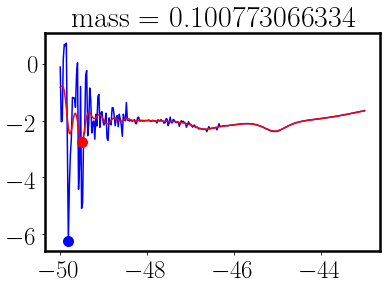

In [204]:
# Single mass
i = 50
y = log10(Ex[:,i])
x = log10(sig)
dy = gradient(y,x[2]-x[1])
dy[isnan(dy)] = 0.0
plt.plot(x,dy,'b-')
plt.plot(x[argmin(dy)],amin(dy),'b.',markersize=20)

#dy = savgol_filter(dy,25,3)
dy = gaussian_filter1d(dy, sigma=3)
dy[isnan(dy)] = 0.0
dy[abs(dy)==inf] = 0.0
plt.plot(x,dy,'r-')
plt.plot(x[argmin(dy)],amin(dy),'r.',markersize=20)

plt.title('mass = '+str(m[i]))

plt.show()

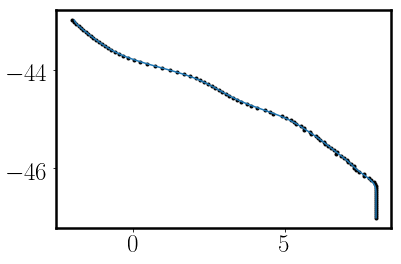

In [122]:
from scipy.ndimage.filters import gaussian_filter1d

ysmoothed = gaussian_filter1d(y, sigma=2)
plt.plot(y,x,'k.')
plt.plot(ysmoothed,x)
plt.show()


In [141]:
flipud(range(ns-1,1)

[]

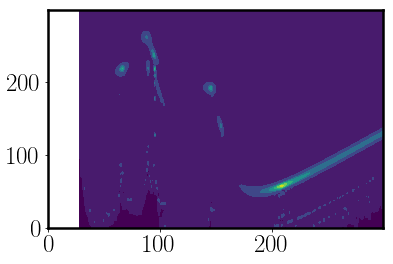

In [202]:
plt.contourf(DY,vmin=-5.0)
plt.show()